In [2]:
import random
import tensorflow
import matplotlib.pyplot as plt
import pickle
import  xlrd
import os
import numpy as np
from PIL import Image,ImageFont,ImageDraw
import xlwt
import  cv2
import  shutil

In [5]:
#得到汉字和字符的映射
def get_dict(path):
    """
    :param path:存储汉字的excel绝对路径，一列存 
    :return: id2word，word2id
    """
    table = xlrd.open_workbook(path)
    sheet = table.sheet_by_index(0)
    id2word = {}
    word2id = {}
    for i in range(sheet.nrows):
        word = sheet.row_values(i)[0]
        id2word[i] = word
        word2id[word] = i
# print(word, type(word))
    return id2word,word2id

table_path = r'汉字编码字符集一级字库3755个（一列）.xls'
id2word, word2id = get_dict(table_path)
with open(r"Data/id2word.pkl","wb") as f:
    pickle.dump(id2word, f)
with open(r"Data/word2id.pkl","wb") as f:
    pickle.dump(word2id, f)

宋 0
(160, 160)
(40, 40) <class 'PIL.Image.Image'>
6400 <class 'numpy.ndarray'>
(160, 160)
(40, 40) <class 'PIL.Image.Image'>
6400 <class 'numpy.ndarray'>
(160, 160)
(40, 40) <class 'PIL.Image.Image'>
6400 <class 'numpy.ndarray'>
(160, 160)
(40, 40) <class 'PIL.Image.Image'>
6400 <class 'numpy.ndarray'>
(160, 160)
(40, 40) <class 'PIL.Image.Image'>
6400 <class 'numpy.ndarray'>
(160, 160)
(40, 40) <class 'PIL.Image.Image'>
6400 <class 'numpy.ndarray'>
(160, 160)
(40, 40) <class 'PIL.Image.Image'>
6400 <class 'numpy.ndarray'>
(160, 160)
(40, 40) <class 'PIL.Image.Image'>
6400 <class 'numpy.ndarray'>
(160, 160)
(40, 40) <class 'PIL.Image.Image'>
6400 <class 'numpy.ndarray'>
(160, 160)
(40, 40) <class 'PIL.Image.Image'>
6400 <class 'numpy.ndarray'>
(160, 160)
(40, 40) <class 'PIL.Image.Image'>
6400 <class 'numpy.ndarray'>
(160, 160)
(40, 40) <class 'PIL.Image.Image'>
6400 <class 'numpy.ndarray'>
(160, 160)
(40, 40) <class 'PIL.Image.Image'>
6400 <class 'numpy.ndarray'>
(160, 160)
(40, 40) <

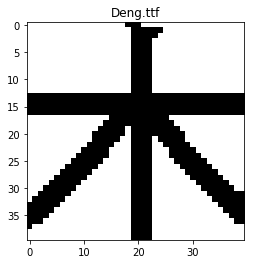

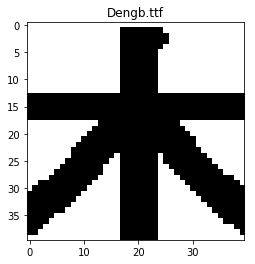

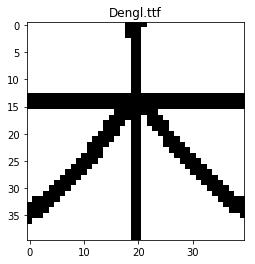

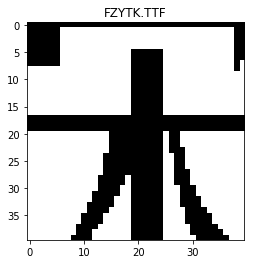

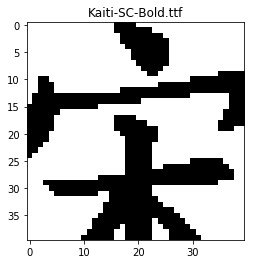

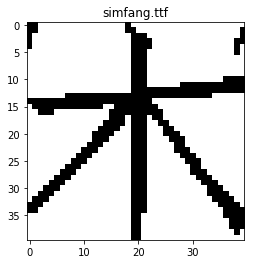

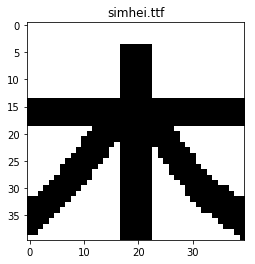

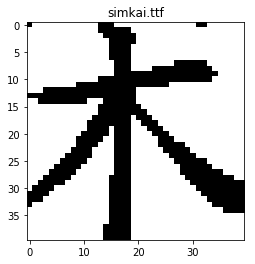

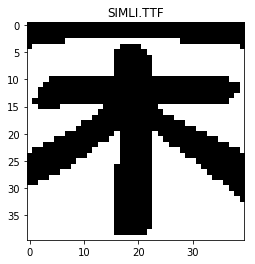

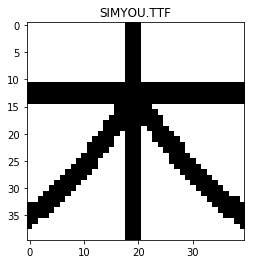

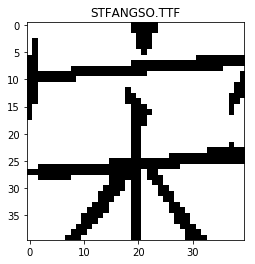

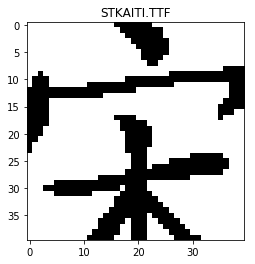

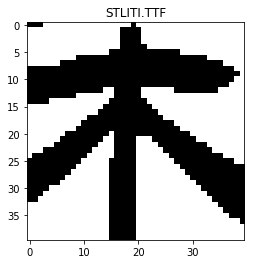

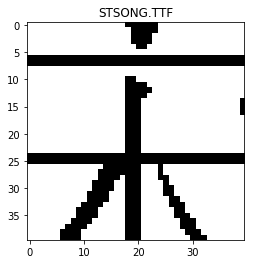

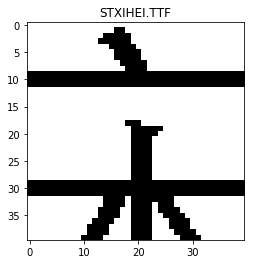

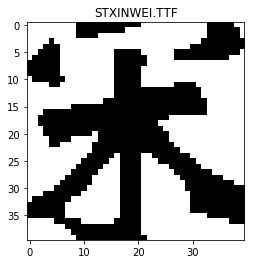

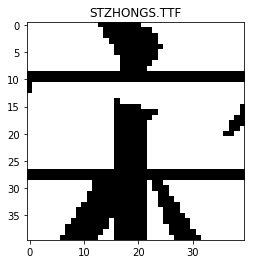

In [25]:
#得到初始数据集
class Font2Img(object):
    """
    
    """
    def __init__(self,
                 width,
                 height,
                 ):
        self.width = width
        self.height = height
    
    def get_image(self,font_path, word, rotate, radius, crop ):
        """
        :param font_path: str,字体文件绝对路径 
        :param word: str,需要转化为图像的一个汉字
        :return: narray,size=(height,width),字体图像
        """
        #白色背景
        y=1
        background = Image.new("RGBA", (self.width, self.height), (255,255,255,255))
        im = Image.new("RGBA",(72,82),(0,0,0,0))
        # print(im.size,"asfads")
        font = ImageFont.truetype(font_path, 72)
        draw = ImageDraw.Draw(im)
        draw.fontmode = "1"
        #黑色字体
        draw.text((0, 0), word, fill="#000000",font = font)   
        fore = im.rotate(rotate,  expand= 1)
        width,height = fore.size
        
        # scale = np.random.uniform(0.8,1.2)
        # fore = fore.resize((int(width *scale), int(height*scale)), Image.ANTIALIAS)
        # width,height = fore.size
        # fore.show()
        background.paste(fore, (80 - width//2 +random.randint(-crop, crop), 80 -crop*y - height//2 + random.randint(-crop, crop)),fore)
        # background.show()
        print(background.size)
        img = background.crop((80-radius, 80-radius, 80+radius, 80+radius))
        #转化为narray类型
        # img.show()
        print(img.size, type(img))
        img = np.asarray(img, dtype='uint8')
        print(img.size, type(img))
        # up, down ,left ,right = self.find_box(img)
        # # print(up, down, left, right)
        # img = img[up:down+1, left:right+1,:]
        return img
    
    def find_box(self, img):
        col_sum = np.sum(img[:,:,0], axis = 0)
        row_sum = np.sum(img[:,:,0], axis = 1)
        left = 0
        right = 0
        up = 0
        down = 0
        #寻找字体上边界
        for i in range(self.height):
            if row_sum[i] > 0:
                up = i
                break
        #寻找字体下边界
        for i in range(self.height - 1, -1, -1):
            if row_sum[i] > 0:
                down = i
                break
         #寻找字体左边界
        for i in range(self.width):
            if col_sum[i] > 0:
                left = i
                break
         #寻找字体右边界
        for i in range(self.width - 1, -1, -1):
            if col_sum[i] > 0: 
                right = i
                break
        return up, down, left, right
                 
def get_data(data_dir, width, height, Rotate, Rotate_step, test_ratio, radius, crop):
    id2word = {}
    word2id = {}
    with open(r"Data/id2word.pkl","rb") as f:
        id2word = pickle.load(f)
    with open(r"Data/word2id.pkl","rb") as f:
        word2id = pickle.load(f)
        
    # for item in 
    train_dir =os.path.join(data_dir, 'train') 
    test_dir = os.path.join(data_dir, 'test')
    for word, id in (('宋', 0),):# word2id.items():
        print(word, id)
        image_list = []
        font2img = Font2Img(width, height)
        for font_name in os.listdir(r"./Fonts"):    
            # print(font_name)
            font_path = os.path.join(r"./Fonts",font_name)
            for rotate in range(-Rotate, Rotate+1, Rotate_step):
                img = font2img.get_image(font_path, word, rotate, radius,crop)
                image_list.append(img)
                plt.imshow(img)
                plt.title(font_name)
                plt.show()
        # test_num = len(image_list) * test_ratio 
        # np.random.shuffle(image_list)
        # count = 0
        # for i in range(len(image_list)):
        #    img = image_list[i] 
        #    if count < test_num:
        #        word_dir =os.path.join(test_dir,'%0.5d'%id) 
        #    else:
        #        word_dir =os.path.join(train_dir,'%0.5d'%id)
        #        
        #    if not os.path.isdir(word_dir): 
        #       os.makedirs(word_dir)
        #    path_image = os.path.join(word_dir, '%d.png'% count)
        #    cv2.imwrite(path_image, img)
        #    count +=1
width = 160
height = 160
Rotate = 0
Rotate_step = 5 
test_ratio = 0.9
radius =20
crop = 0
data_dir = r'KNNData'
get_data(data_dir, width, height, Rotate, Rotate_step, test_ratio, radius, crop)